In [1]:
import os
import pandas as pd
from math import floor
import matplotlib
from matplotlib import pyplot, patches
pyplot.style.use("ggplot")

# Plot Figure 2 (FDR curves for $p$-mutations) for the paper

## Load computed FDR estimate and (number of mutations per megabase) information

In [2]:
# This dict will map decoy context name to a DataFrame indicating the FDR estimates for this context
ctx2fdr = {}

output_dir = "/Poppy/mfedarko/sheepgut/sf-analyses/sheep/output/fdr-estimate/"

numpermbs = pd.read_csv(os.path.join(output_dir, "num-mutations-per-mb.tsv"), sep="\t", index_col=0)

for tsv_fp in os.listdir(output_dir):
    if tsv_fp.startswith("fdr-"):
        # remove the starting "fdr-" and ending ".tsv"
        ctx = tsv_fp[4:-4]
        ctx2fdr[ctx] = pd.read_csv(os.path.join(output_dir, tsv_fp), sep="\t", index_col=0)
    
print(f"All {len(ctx2fdr):,} decoy context(s) we found:\n -", "\n - ".join(ctx2fdr.keys()))
ctx2fdr["CP2"].head()

All 11 decoy context(s) we found:
 - CP2
 - CP2Nonsense
 - CP2Nonsyn
 - CP2Tv
 - CP2TvNonsense
 - Full
 - Nonsense
 - Nonsyn
 - Tv
 - TvNonsense
 - TvNonsyn


,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,...,p490,p491,p492,p493,p494,p495,p496,p497,p498,p499
Contig,,,,,,,,,,,,,,,,,,,,,
edge_1,26.421205,21.959295,17.710583,15.517699,13.263902,11.497412,9.791835,8.878134,7.61418,6.761392,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edge_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edge_100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edge_1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edge_10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
numpermbs.head()

,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,...,p490,p491,p492,p493,p494,p495,p496,p497,p498,p499
Contig,,,,,,,,,,,,,,,,,,,,,
edge_1,16630.860609,16630.860609,16630.860609,16630.860609,16630.860609,16630.860609,16630.860609,16630.860609,16630.860609,16630.860609,...,25.274864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
edge_10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
edge_100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
edge_1000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
edge_10000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Load diversity index information and select high-diversity-index contigs

We'll show a grid of FDR curves of various high-diversity-index MAGs at the top of the figure, just to underscore the point that these sorts of curves can be drawn for arbitrary MAGs, and look somewhat similar for high-diversity-index MAGs.

We computed multiple columns of diversity indices (using different values of $p$) when running `strainFlye call`. How do we choose which diversity index to use to select high-diversity index contigs? The choice is arbitrary -- ideally, we want to minimize $p$ (or $r$), while making sure that there are still a reasonable number of contigs with this diversity index defined.

In [4]:
di = pd.read_csv(
    "/Poppy/mfedarko/sheepgut/sf-analyses/sheep/output/call-p15/diversity-indices.tsv", sep="\t", index_col=0
)
long_di = di[di["Length"] >= 1000000]
long_di_sorted = long_di.sort_values(["DivIdx(p=50,minSuffCov=1000.0)"], ascending=False)
long_di_sorted.head(10)

,AverageCoverage,Length,"DivIdx(p=25,minSuffCov=2000.0)","DivIdx(p=50,minSuffCov=1000.0)","DivIdx(p=100,minSuffCov=500.0)","DivIdx(p=200,minSuffCov=250.0)","DivIdx(p=500,minSuffCov=100.0)","DivIdx(p=1000,minSuffCov=50.0)","DivIdx(p=2500,minSuffCov=20.0)","DivIdx(p=5000,minSuffCov=10.0)"
Contig,,,,,,,,,,
edge_3030,1035.740707,1915304,NaN,0.041088,0.033952,0.031322,0.025060,0.017557,4.156003e-04,1.566332e-06
edge_3402,877.282137,3713351,NaN,0.024924,0.018800,0.012130,0.002100,0.000195,1.008768e-04,2.706565e-07
edge_7356,742.905564,1602179,NaN,0.024833,0.021453,0.017328,0.006580,0.001584,2.563919e-04,0.000000e+00
edge_7354,1119.104000,1036318,NaN,0.023789,0.018875,0.015372,0.009458,0.005996,1.543928e-05,0.000000e+00
edge_7349,1325.510426,1175877,NaN,0.012973,0.010487,0.008060,0.003285,0.001409,3.500673e-04,1.713526e-06
edge_1671,1415.072755,2153394,NaN,0.011340,0.010501,0.008338,0.003400,0.000240,4.679987e-07,0.000000e+00
edge_23917,1987.798829,1020213,0.013810,0.009018,0.003313,0.000775,0.000467,0.000306,0.000000e+00,0.000000e+00
edge_11863,1057.411793,2597011,NaN,0.001933,0.000818,0.000670,0.000345,0.000208,1.136314e-04,3.898408e-07
edge_4773,1176.249727,1371455,NaN,0.001268,0.000947,0.000865,0.000841,0.000556,0.000000e+00,0.000000e+00


## Plot FDR curves

### Various settings

In [5]:
# rainbow colorscheme - inspired by Elias/Gygi '07, Fig. 2a & 2b (and also homestuck lol)
#
# Note that we have 10 colors, not 11, since we will not be plotting the "CP2Nonsyn" context (see
# below for details)
rainbow = [
    "#713F16", "#D40000", "#D47400", "#D4CE00", "#2F8C04",
    "#00BBC3", "#0079CC", "#0022CC", "#790096", "#CC007C"
]

# go o+solid, o+dashed, o+dotted, o+dashdot, D+solid, ...
# this way of varying linestyles and markers means that even if the reader cannot perceive
# differences in color they should still be able to unambiguously figure out which line is which
# see https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
linestyles = ["solid", (0,(5,1)), (0, (1,1)), "dashdot"] * 3
markers = (["o"] * 4) + (["D"] * 4) + (["*"] * 2)

# Draw a line indicating "wow we can fix the estimated FDR here"
fdr_fix_pct = 1
fdr_fix_color = "#333"

# What contigs are we going to plot?
small_plot_contigs = list(long_di_sorted.index[:8])
BIG_CONTIG = "edge_1671"
assert BIG_CONTIG in small_plot_contigs

# What contexts are we going to plot, and what colors do we want to use?
# Let's order them up here, so that we can consistently map them to a color + style.
#
# Also, we order them using the lowest value of p's estimated FDR for BACT1 -- this way, the big
# plot has a nice rainbow effect, and the small plots can use the exact same colors.
ctxs = sorted(ctx2fdr.keys(), key=lambda ctx: ctx2fdr[ctx]["p15"][BIG_CONTIG])

# don't plot CP2Nonsyn because it is REALLY difficult to distinguish visually from CP2
# (I've kept "CP2 + Nonsynonymous" as an option because it is technically slightly different
# from just CP2 -- this is because there is one synonymous single-nucleotide CP2 mutation,
# TGA (stop) <---> TAA (stop).)
ctxs.remove("CP2Nonsyn")

# Keep it simple for the small plots, which don't have a ton of space
ctx_to_plot_small = ["Full", "CP2", "Tv", "Nonsense"]

# Map context names to colors, linestyles, and markers
ctx2color = {}
ctx2linesty = {}
ctx2marker = {}
for ci, ctx in enumerate(ctxs):
    ctx2color[ctx] = rainbow[ci]
    ctx2linesty[ctx] = linestyles[ci]
    ctx2marker[ctx] = markers[ci]

# Also map context names to easier-to-read ones
ctx2name = {
    "CP2": "CP2",
    "CP2Nonsense": "CP2 & Nonsense",
    "CP2Nonsyn": "CP2 & Nonsyn",
    "CP2Tv": "CP2 & Tv",
    "CP2TvNonsense": "CP2 & Tv & Nonsense",
    "Full": "Full [no context]",
    "Nonsense": "Nonsense",
    "Nonsyn": "Nonsyn",
    "Tv": "Tv",
    "TvNonsense": "Tv & Nonsense",
    "TvNonsyn": "Tv & Nonsyn",
}
    
pvals = [int(pstr[1:]) for pstr in numpermbs.columns]
min_p = min(pvals)
max_p = max(pvals)

special_p_kwargs = {"color": "#333", "fontsize": 17, "fontweight": "semibold"}

### Utility function(s)

In [15]:
def plot_fdr_curves(ctx2fdr, numpermbs, contig, ctx_to_plot, ax, lw=3, markersize=5, xlim_min=-0.3):
    thresh_vals = [int(tstr[1:]) for tstr in numpermbs.columns]
    tt = numpermbs.columns[0][0]
    assert tt in ["p", "r"]
    xlim_max = 100
    for ctx in ctx_to_plot:
        x = []
        y = []
        best_thresh = None
        
        xvals = ctx2fdr[ctx].loc[contig]
        yvals = numpermbs.loc[contig]
        
        for f, n, thresh in zip(xvals, yvals, thresh_vals):
            if not pd.isna(f):
                x.append(f)
                y.append(n)
                
                errtext = f"for ctx {ctx} for contig {contig}"
                # this case can be handled, of course, but it's nice to know when things get high
                # *don't* need to clamp
                if f >= xlim_max:
                    print(f"FYI we found an est FDR = {f}% >= {xlim_max}% {errtext}")
                    xlim_max = f * 1.2
                    
                # should never happen
                if f < 0:
                    raise ValueError(f"Found an est FDR = {f}% < 0% {errtext} (what????)")
                    
                if f <= fdr_fix_pct:
                    # we're iterating through these in ascending order, so i guess we could
                    # just break once we see a "passing" value of p. but let's idiotproof this
                    # in case i change the order later lol
                    if best_thresh is None or thresh < best_thresh:
                        best_thresh = thresh

        if best_thresh is not None:
            if tt == "p":
                ts = f"($p$ = {best_thresh / 100:.2f}%)"
            else:
                ts = f"($r$ = {best_thresh:,})"
            label = f"{ctx2name[ctx]} {ts}"
            
        else:
            label = f"{ctx2name[ctx]} (no rare mutations selectable)"
                        
        # plot the curve itself
        ax.plot(
            x,
            y,
            color=ctx2color[ctx],
            linestyle=ctx2linesty[ctx],
            marker=ctx2marker[ctx],
            lw=lw,
            label=label,
            markersize=markersize
        )
        
    ax.axvline(x=fdr_fix_pct, linestyle="--", color=fdr_fix_color, lw=lw)
    
    ax.set_xscale("symlog")
    ax.xaxis.set_major_formatter("{x:,.0f}")
    ax.yaxis.set_major_formatter("{x:,.0f}")
    ax.set_xlim(xlim_min, xlim_max)
    
    ax.tick_params(axis="y", which="major", labelsize=13)
    ax.tick_params(axis="x", which="major", labelsize=13)
    ax.tick_params(axis="x", which="minor", labelsize=12)

### Actually do plotting!

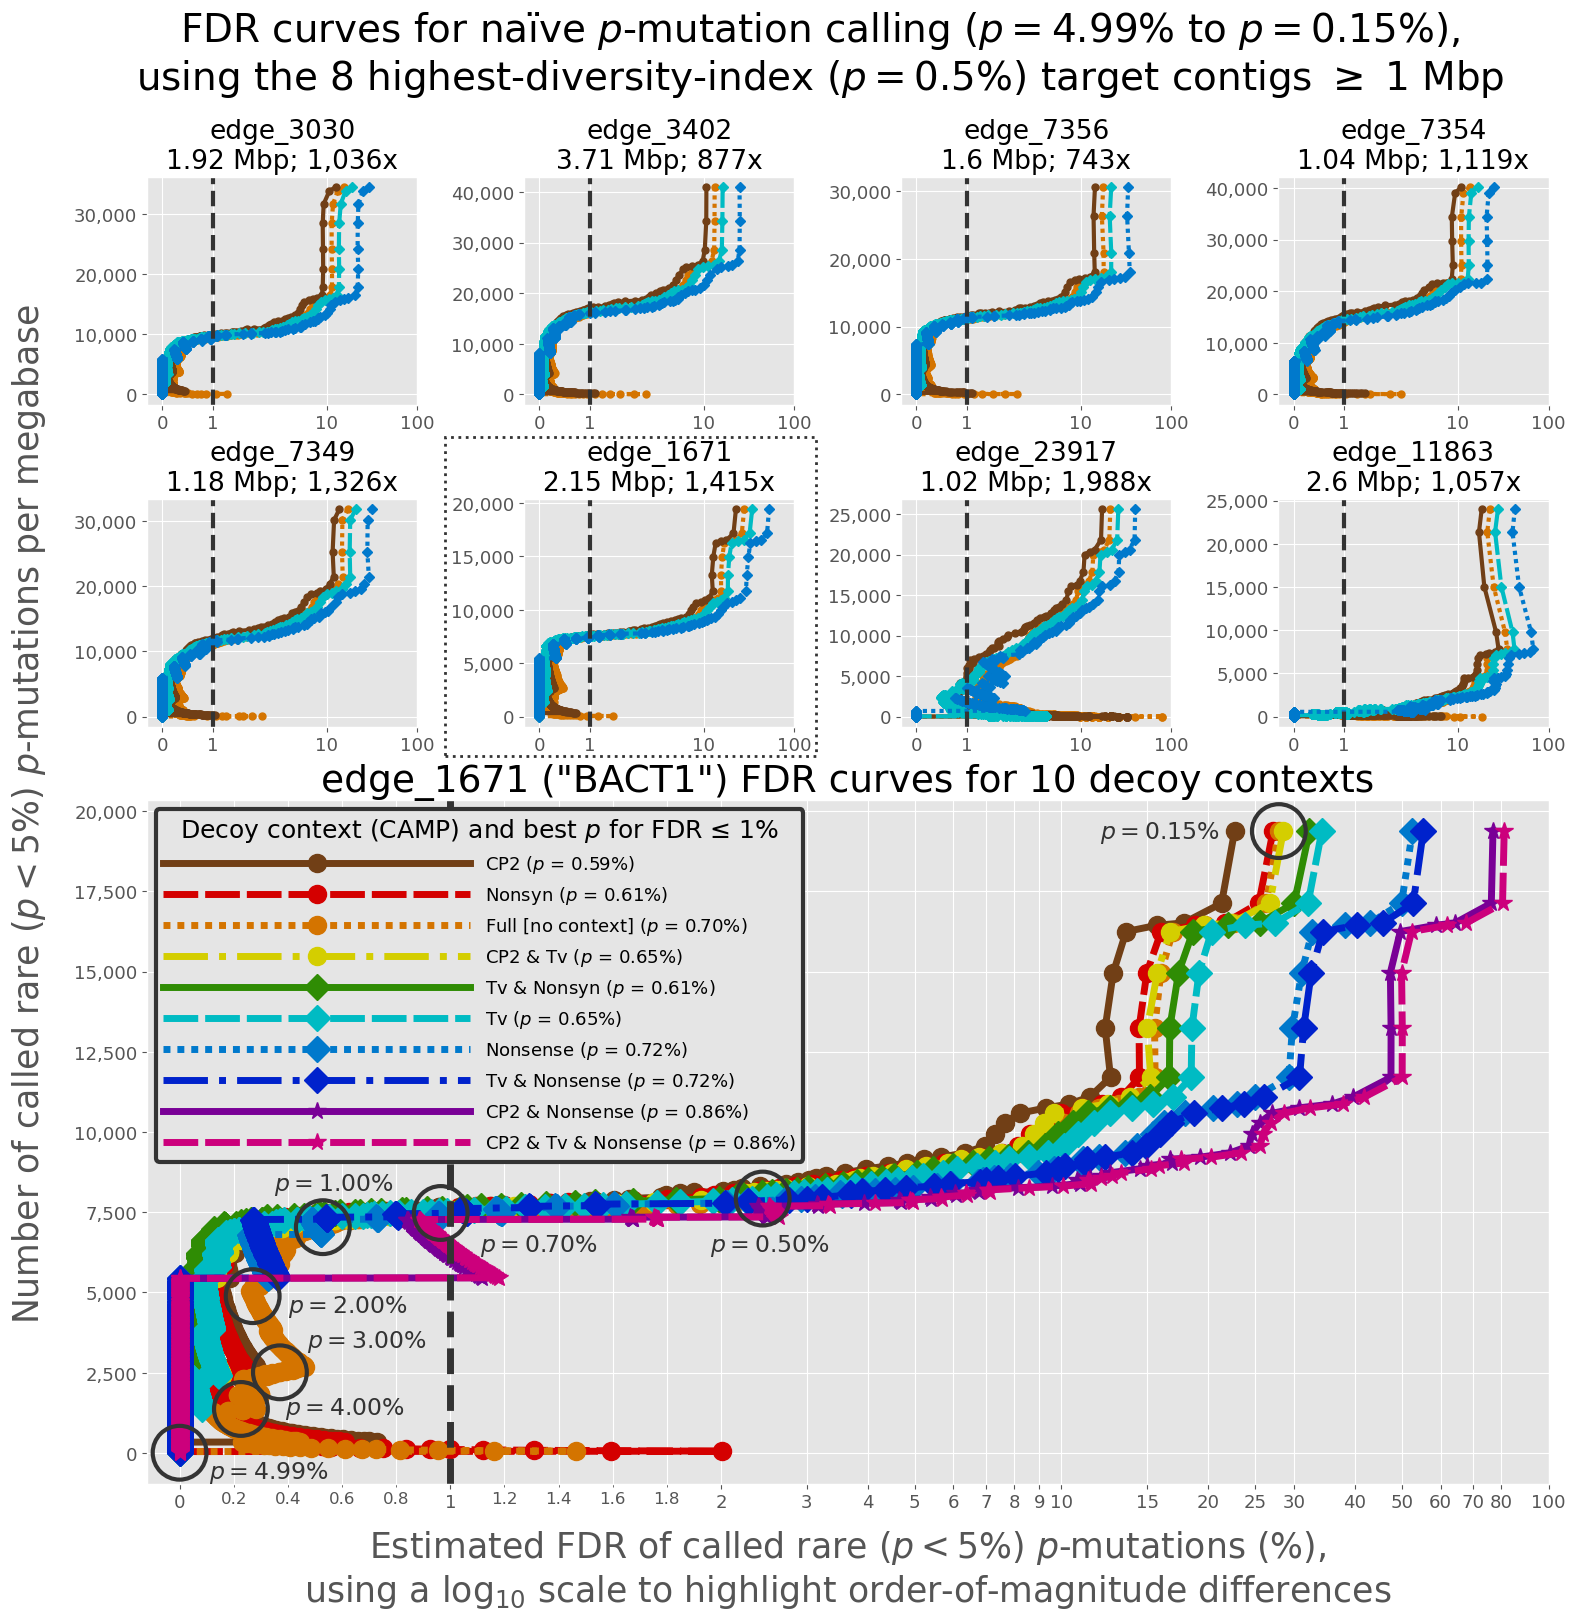

In [21]:
# subplot_mosaic() is a really nice way of making fancy subplots where things span multiple rows/cols;
# see https://stackoverflow.com/a/70004388
#
# The labels 0 through 7 refer to tiny FDR curves; the 8 is the biiig FDR curve for the BIG_CONTIG (aka BACT1)
fig, axes = pyplot.subplot_mosaic(
    [
        [0, 1, 2, 3],
        [4, 5, 6, 7],
        [8, 8, 8, 8],
        [8, 8, 8, 8],
        [8, 8, 8, 8],
    ],
    constrained_layout=True
)

for ci, contig in enumerate(small_plot_contigs):
    # We'll organize the grid of plots starting from the top-left and moving right:
    # 0 1 2 3
    # 4 5 6 7
    # This matches the suplot mosaic labels we set above.
    
    # the decoy doesn't have FDR estimates
    assert contig != "edge_6104"
    
    # set up title
    length_info = f"{round(long_di_sorted['Length'][contig] / 1e6, 2):,} Mbp"
    cov_info = f"{round(long_di_sorted['AverageCoverage'][contig]):,}x"
    title = f"{contig}\n{length_info}; {cov_info}"
    axes[ci].set_title(title, fontsize=19)
    
    plot_fdr_curves(ctx2fdr, numpermbs, contig, ctx_to_plot_small, axes[ci])
    
plot_fdr_curves(ctx2fdr, numpermbs, "edge_1671", ctxs, axes[8], lw=5, markersize=13, xlim_min=-0.12)

# fancy x-axis stuff for the bottom plot
# from https://nbviewer.org/github/fedarko/sheepgut/blob/main/notebooks/DemonstratingTargetDecoyApproach.ipynb
ff = matplotlib.ticker.FuncFormatter(
    lambda x, pos: str(int(x)) if x > 20 else "{:,}".format(x)
)
axes[8].xaxis.set_major_formatter(ff)
axes[8].xaxis.set_minor_formatter(ff)
axes[8].set_xticks([x / 10 for x in range(2, 20, 2)], minor=True)
axes[8].set_xticks([0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100])
# axes[8].tick_params(axis="x", which="major", labelsize=13)
# # axes[8].tick_params(axis="x", which="minor", labelsize=10.5)

# fancy legend for the bottom plot
axes[8].legend(
    handlelength=17,
    fontsize=13,
    title="Decoy context (CAMP) and best $p$ for FDR \u2264 1%",
    title_fontsize=18,
    framealpha=1,
    edgecolor="#333",
).get_frame().set_linewidth(3)

# title for the bottom plot
axes[8].set_title(
    f'edge_1671 ("BACT1") FDR curves for {len(ctxs):,} decoy contexts',
    fontsize=27
)

# the minor ticks don't make vertical gridlines show up by default -- this fixes that
axes[8].grid(which="both", color="white")

# highlight p = 4.99%, p = 4%, p = 3%, p = 2%, p = 1%, p = 0.5%, p = 0.15%
# https://nbviewer.org/github/fedarko/sheepgut/blob/main/notebooks/ReadClustering-DiverseGene.ipynb
yvals = numpermbs.loc[BIG_CONTIG]
sp2xy = {
    15: [12, 19150],
    50: [1.96, 6300],
    70: [1.11, 6300],
    100: [0.35, 8200],
    200: [0.4, 4400],
    300: [0.47, 3300],
    400: [0.39, 1200],
    499: [0.11, -800]
}
for special_p in [499, 400, 300, 200, 100, 70, 50, 15]:
    p = f"p{special_p}"
    x = ctx2fdr["Full"][p][BIG_CONTIG]
    axes[8].scatter(x, yvals[p], 1500, color="#333", facecolor="none", lw=3, zorder=999)
    
    if special_p in sp2xy:
        tsp = f"$p = {special_p / 100:.2f}\%$"
        axes[8].text(*sp2xy[special_p], tsp, **special_p_kwargs)
        
        # just for sanity checking - you can use this to verify that the sp2xy coordinates
        # point to the correct values of p
        # axes[8].text(x, yvals[p], special_p)

# Add a rectangle surrounding the subplot for the small edge_1671 FDR curve, indicating
# "hey this is the same data as shown in the big curve below"; see
# https://stackoverflow.com/a/37437395 and https://stackoverflow.com/a/41912643
# (Doing this using manual positioning seemed easier than some of the more specific solutions,
# e.g. https://stackoverflow.com/q/62375119 -- although maybe that's just me being averse to
# reading other people's code :)
bact1_rect = patches.Rectangle(
    (0.25, 0.572), 0.247, 0.213, edgecolor="#333", facecolor="None", lw=2, linestyle=":",
    transform=fig.transFigure
)
fig.patches.extend([bact1_rect])

rare_text = "called rare ($p < 5\%$) $p$-mutations"
fig.text(
    -0.04, 0.2, f"Number of {rare_text} per megabase",
    fontsize=25, rotation="vertical", color="#555"
)
axes[8].set_xlabel(
    (
        f"Estimated FDR of {rare_text} (%),\n"
        "using a log$_{{10}}$ scale to highlight order-of-magnitude differences"
    ),
    fontsize=25, color="#555", labelpad=12
)
fig.suptitle(
    (
        f"FDR curves for na\u00efve $p$-mutation calling ($p = {max_p / 100:.2f}\%$ to $p = {min_p / 100:.2f}\%$),\n"
        f"using the {len(small_plot_contigs):,} highest-diversity-index ($p = 0.5\%$) target contigs $\geq$ 1 Mbp"
    ),
    fontsize=28,
    y=1.07
)
fig.set_size_inches(15, 15)
fig.savefig("../../notebooks/figs/sheepgut_fdr_curves.pdf", bbox_inches="tight")

# Alternately: FDR curves for $r$-mutations

We used to show these in the paper's supplement, then we got rid of them because we now don't recommend using $r$-mutations as the starting point for FDR estimation. See the paper supplement for details. (I'm leaving this figure in this notebook, though, just to demonstrate that it's possible to create similar FDR curves based on $r$-mutations -- although the actual FDRs that are estimated are kinda wacky.)

In [17]:
ctx2fdr_r = {}
output_dir_r = "/Poppy/mfedarko/sheepgut/sf-analyses/sheep/output/fdr-estimate-r/"
numpermbs_r = pd.read_csv(os.path.join(output_dir_r, "num-mutations-per-mb.tsv"), sep="\t", index_col=0)
for tsv_fp in os.listdir(output_dir_r):
    if tsv_fp.startswith("fdr-"):
        # remove the starting "fdr-" and ending ".tsv"
        ctx = tsv_fp[4:-4]
        ctx2fdr_r[ctx] = pd.read_csv(os.path.join(output_dir_r, tsv_fp), sep="\t", index_col=0)
print(f"All {len(ctx2fdr_r):,} decoy context(s) we found:\n -", "\n - ".join(ctx2fdr_r.keys()))

All 11 decoy context(s) we found:
 - CP2
 - CP2Nonsense
 - CP2Nonsyn
 - CP2Tv
 - CP2TvNonsense
 - Full
 - Nonsense
 - Nonsyn
 - Tv
 - TvNonsense
 - TvNonsyn


In [18]:
rvals = [int(rstr[1:]) for rstr in numpermbs_r.columns]
min_r = min(rvals)
max_r = max(rvals)

FYI we found an est FDR = 279.671354172518% >= 100% for ctx Full for contig edge_3030
FYI we found an est FDR = 353.59642618936056% >= 335.6056250070216% for ctx Tv for contig edge_3030
FYI we found an est FDR = 454.0258890958638% >= 424.31571142723266% for ctx Nonsense for contig edge_3030
FYI we found an est FDR = 232.56393714520752% >= 100% for ctx Full for contig edge_3402
FYI we found an est FDR = 294.0371826009244% >= 279.076724574249% for ctx Tv for contig edge_3402
FYI we found an est FDR = 377.5504597044044% >= 352.84461912110925% for ctx Nonsense for contig edge_3402
FYI we found an est FDR = 302.0623730214976% >= 100% for ctx Full for contig edge_7356
FYI we found an est FDR = 381.90602645987633% >= 362.4748476257971% for ctx Tv for contig edge_7356
FYI we found an est FDR = 490.3760625726912% >= 458.2872317518516% for ctx Nonsense for contig edge_7356
FYI we found an est FDR = 252.34345879186085% >= 100% for ctx Full for contig edge_7354
FYI we found an est FDR = 319.044992

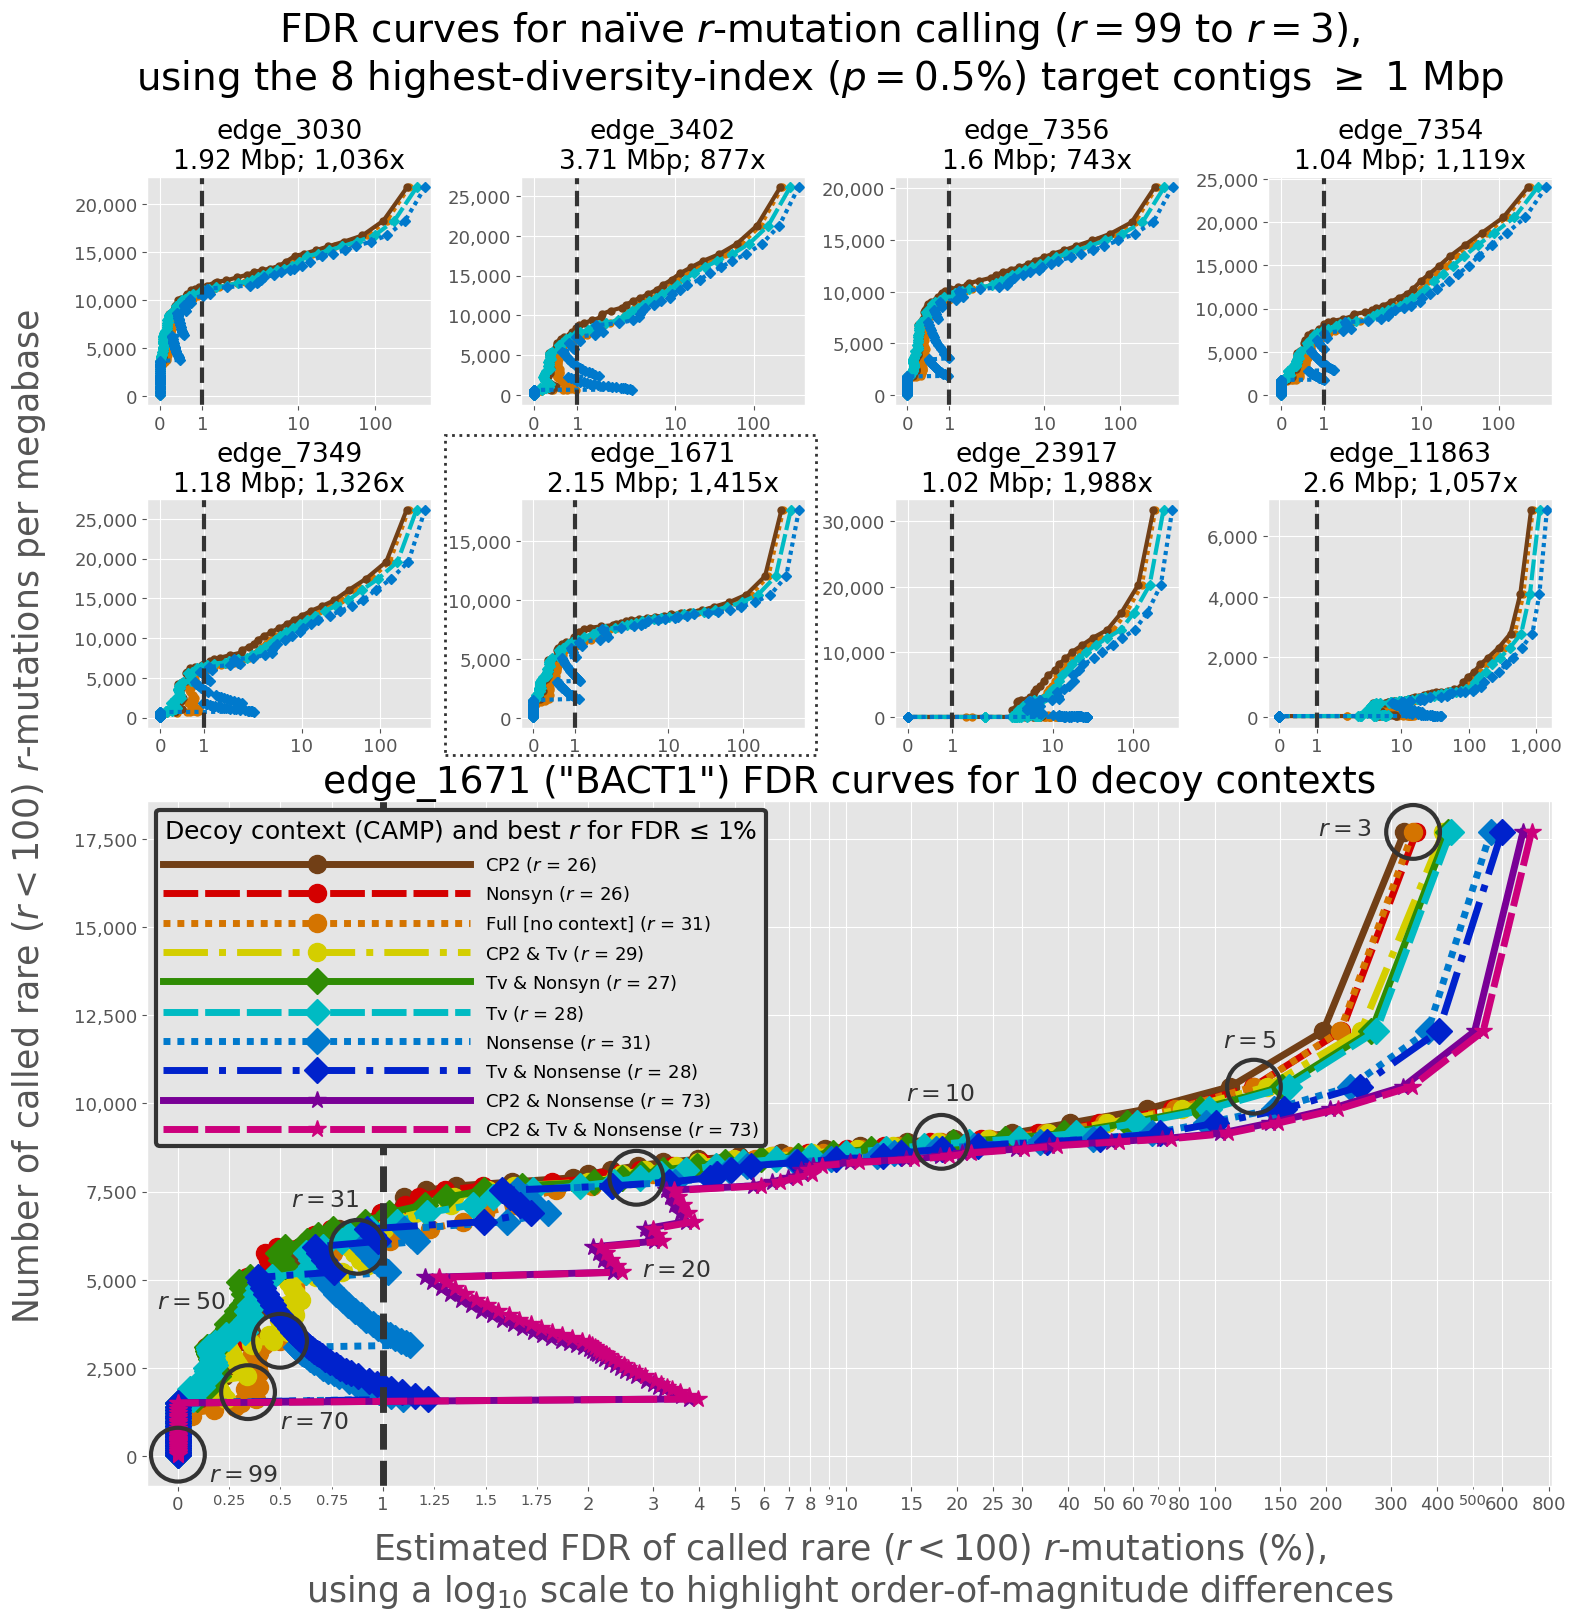

In [19]:
fig, axes = pyplot.subplot_mosaic(
    [
        [0, 1, 2, 3],
        [4, 5, 6, 7],
        [8, 8, 8, 8],
        [8, 8, 8, 8],
        [8, 8, 8, 8],
    ],
    constrained_layout=True
)

for ci, contig in enumerate(small_plot_contigs):
    assert contig != "edge_6104"
    
    # set up title
    length_info = f"{round(long_di_sorted['Length'][contig] / 1e6, 2):,} Mbp"
    cov_info = f"{round(long_di_sorted['AverageCoverage'][contig]):,}x"
    title = f"{contig}\n{length_info}; {cov_info}"
    axes[ci].set_title(title, fontsize=19)
    
    plot_fdr_curves(ctx2fdr_r, numpermbs_r, contig, ctx_to_plot_small, axes[ci])
    
plot_fdr_curves(ctx2fdr_r, numpermbs_r, "edge_1671", ctxs, axes[8], lw=5, markersize=13, xlim_min=-0.15)

# fancy x-axis stuff for the bottom plot
# from https://nbviewer.org/github/fedarko/sheepgut/blob/main/notebooks/DemonstratingTargetDecoyApproach.ipynb
ff = matplotlib.ticker.FuncFormatter(
    lambda x, pos: str(int(x)) if x >= 2 else "{:,}".format(x)
)
axes[8].xaxis.set_major_formatter(ff)
axes[8].xaxis.set_minor_formatter(ff)
axes[8].set_xticks([0.25, 0.5, 0.75, 1.25, 1.5, 1.75, 9, 70, 500], minor=True)
axes[8].set_xticks(
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 15, 20, 25,
     30, 40, 50, 60, 80, 100, 150, 200, 300, 400, 600, 800])
axes[8].tick_params(axis="x", which="major", labelsize=13)
axes[8].tick_params(axis="x", which="minor", labelsize=10.5)

# fancy legend for the bottom plot
axes[8].legend(
    handlelength=17,
    fontsize=13,
    title="Decoy context (CAMP) and best $r$ for FDR \u2264 1%",
    title_fontsize=18,
    framealpha=1,
    edgecolor="#333",
    # for some reason, the matplotlib PDF output had the legend in the bottom right,
    # even though the preview shown in this notebook had it in the upper left.
    # to make the legend location in this figure consistent with the p-mutation fdr
    # curve, i manually set it to "upper left" here.
    loc="upper left"
).get_frame().set_linewidth(3)

# title for the bottom plot
axes[8].set_title(
    f'edge_1671 ("BACT1") FDR curves for {len(ctxs):,} decoy contexts',
    fontsize=27
)

# the minor ticks don't make vertical gridlines show up by default -- this fixes that
axes[8].grid(which="both", color="white")

# # highlight certain values of r
yvals = numpermbs_r.loc[BIG_CONTIG]
sr2xy = {
    3: [190, 17600],
    5: [105, 11600],
    10: [14.5, 10100],
    20: [2.8, 5100],
    31: [0.55, 7100],
    50: [-0.1, 4200],
    70: [0.5, 800],
    99: [0.15, -700]
}
for special_r in [99, 70, 50, 31, 20, 10, 5, 3]:
    r = f"r{special_r}"
    x = ctx2fdr_r["Full"][r][BIG_CONTIG]
    axes[8].scatter(x, yvals[r], 1500, color="#333", facecolor="none", lw=3, zorder=999)

    if special_r in sr2xy:
        tsp = f"$r = {special_r}$"
        axes[8].text(*sr2xy[special_r], tsp, **special_p_kwargs)

        # just for sanity checking - you can use this to verify that the sp2xy coordinates
        # point to the correct values of p
        # axes[8].text(x, yvals[r], tsp, zorder=10000, **special_p_kwargs)

# Add a rectangle surrounding the subplot for the small edge_1671 FDR curve, indicating
# "hey this is the same data as shown in the big curve below"; see
# https://stackoverflow.com/a/37437395 and https://stackoverflow.com/a/41912643
# (Doing this using manual positioning seemed easier than some of the more specific solutions,
# e.g. https://stackoverflow.com/q/62375119 -- although maybe that's just me being averse to
# reading other people's code :)
bact1_rect = patches.Rectangle(
    (0.25, 0.573), 0.247, 0.213, edgecolor="#333", facecolor="None", lw=2, linestyle=":",
    transform=fig.transFigure
)
fig.patches.extend([bact1_rect])

rare_text = "called rare ($r < 100$) $r$-mutations"
fig.text(
    -0.04, 0.2, f"Number of {rare_text} per megabase",
    fontsize=25, rotation="vertical", color="#555"
)
axes[8].set_xlabel(
    (
        f"Estimated FDR of {rare_text} (%),\n"
        "using a log$_{{10}}$ scale to highlight order-of-magnitude differences"
    ),
    fontsize=25, color="#555", labelpad=12
)
fig.suptitle(
    (
        f"FDR curves for na\u00efve $r$-mutation calling ($r = {max_r}$ to $r = {min_r}$),\n"
        f"using the {len(small_plot_contigs):,} highest-diversity-index ($p = 0.5\%$) target contigs $\geq$ 1 Mbp"
    ),
    fontsize=28,
    y=1.07
)
fig.set_size_inches(15, 15)
fig.savefig("../../notebooks/figs/sheepgut_fdr_curves_r.pdf", bbox_inches="tight")